In [75]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import numpy as np

In [199]:
c = Configuration

In [194]:
c = Configuration(name='test', birthday=datetime(2021,1,1))

In [14]:
from distutils.util import strtobool

In [196]:
c.name

'test'

In [180]:
import dask.array as da

x = da.arange(6, chunks=3)

In [189]:
a.dt = 0.5

NameError: name 'a' is not defined

In [188]:
x

dask.array<arange, shape=(6,), dtype=int64, chunksize=(3,), chunktype=numpy.ndarray>

In [181]:
x.map_blocks(lambda x: x * 2).compute()

array([ 0,  2,  4,  6,  8, 10])

In [185]:
y = x.map_blocks(lambda x: np.fft.fft(x)).compute()

In [187]:
len(y)

6

In [104]:
filename = 'output/test_1year.nc'
df = xr.open_dataset(filename)

In [105]:
# simple function to fix the axis and make plot prettier
def geo_map(ax):
    # ticks
    ax.set_xticks([-90, -80, -70, -60], crs=ccrs.PlateCarree())
    ax.set_yticks([10, 20, 30], crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())

    # add land and coastline
    ax.add_feature(cfeature.LAND, facecolor='darkgrey', zorder=1)
    ax.add_feature(cfeature.COASTLINE, linewidth=0.25, zorder=1)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    
    ax.set_extent([-98, -50, 3, 32])

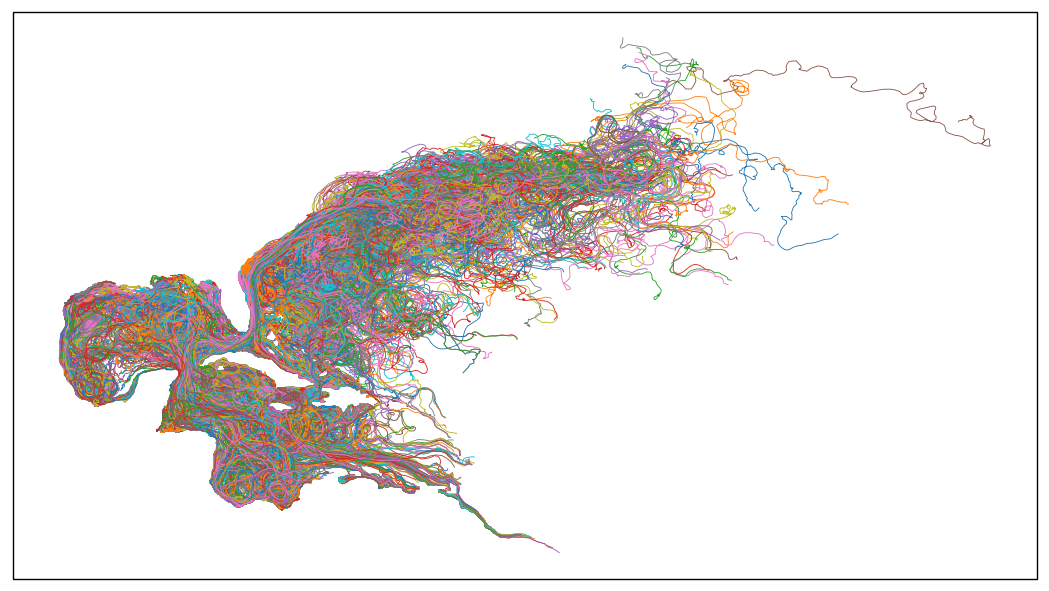

In [106]:
fig = plt.figure(figsize=(12,6), dpi=125)
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree())

ax.plot(df.lon.T, df.lat.T, linewidth=0.5);
#geo_map(ax)

In [90]:
df.close()